# Finding Roots of Equations

## Calculus review

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as scipy
from scipy.interpolate import interp1d

Let's review the theory of optimization for multivariate functions. Recall that in the single-variable case, extreme values (local extrema) occur at points where the first derivative is zero, however, the vanishing of the first derivative is not a sufficient condition for a local max or min.  Generally, we apply the second derivative test to determine whether a candidate point is a max or min (sometimes it fails - if the second derivative either does not exist or is zero).  In the multivariate case, the first and second derivatives are *matrices*.  In the case of a scalar-valued function on $\mathbb{R}^n$, the first derivative is an $n\times 1$ vector called the *gradient* (denoted $\nabla f$). The second derivative is an $n\times n$ matrix called the *Hessian* (denoted $H$)

Just to remind you, the gradient and Hessian are given by:

$$\nabla f(x) = \left(\begin{matrix}\frac{\partial f}{\partial x_1}\\ \vdots \\\frac{\partial f}{\partial x_n}\end{matrix}\right)$$


$$H = \left(\begin{matrix}
  \dfrac{\partial^2 f}{\partial x_1^2} & \dfrac{\partial^2 f}{\partial x_1\,\partial x_2} & \cdots & \dfrac{\partial^2 f}{\partial x_1\,\partial x_n} \\[2.2ex]
  \dfrac{\partial^2 f}{\partial x_2\,\partial x_1} & \dfrac{\partial^2 f}{\partial x_2^2} & \cdots & \dfrac{\partial^2 f}{\partial x_2\,\partial x_n} \\[2.2ex]
  \vdots & \vdots & \ddots & \vdots \\[2.2ex]
  \dfrac{\partial^2 f}{\partial x_n\,\partial x_1} & \dfrac{\partial^2 f}{\partial x_n\,\partial x_2} & \cdots & \dfrac{\partial^2 f}{\partial x_n^2}
\end{matrix}\right)$$

One of the first things to note about the Hessian - it's symmetric. This structure leads to some useful properties in terms of interpreting critical points.

The multivariate analog of the test for a local max or min turns out to be a statement about the gradient and the Hessian matrix.  Specifically, a function $f:\mathbb{R}^n\rightarrow \mathbb{R}$ has a critical point at $x$ if $\nabla f(x) = 0$ (where zero is the zero vector!).  Furthermore, the second derivative test at a critical point is as follows:

* If $H(x)$ is positive-definite ($\iff$ it has all positive eigenvalues), $f$ has a local minimum at $x$
* If $H(x)$ is negative-definite ($\iff$ it has all negative eigenvalues), $f$ has a local maximum at $x$
* If $H(x)$ has both positive and negative eigenvalues, $f$ has a saddle point at $x$.

If you have $m$ equations with $n$ variables, then the $m \times n$ matrix of first partial derivatives is known as the Jacobian $J(x)$. For example, for two equations $f(x, y)$ and $g(x, y)$, we have

$$
J(x) = \begin{bmatrix}
\frac{\delta f}{\delta x} & \frac{\delta f}{\delta y} \\
\frac{\delta g}{\delta x} & \frac{\delta g}{\delta y} 
\end{bmatrix}
$$

We can now express the multivariate form of Taylor polynomials in a familiar format.

$$
f(x + \delta x) = f(x) + \delta x \cdot J(x) + \frac{1}{2} \delta x^T H(x) \delta x + \mathcal{O}(\delta x^3)
$$

## Main Issues in Root Finding in One Dimension

* Separating close roots
* Numerical Stability
* Rate of Convergence
* Continuity and Differentiability

## Bisection Method

The bisection method is one of the simplest methods for finding zeros of a non-linear function.  It is guaranteed to find a root - but it can be slow. The main idea comes from the intermediate value theorem:  If $f(a)$ and $f(b)$ have different signs and $f$ is continuous, then $f$ must have a zero between $a$ and $b$.  We evaluate the function at the midpoint, $c = \frac12(a+b)$. $f(c)$ is either zero, has the same sign as $f(a)$ or the same sign as $f(b)$.  Suppose $f(c)$ has the same sign as $f(a)$ (as pictured below).  We then repeat the process on the interval $[c,b]$.  

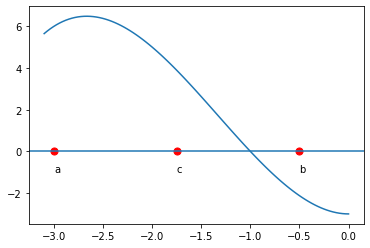

In [2]:
def f(x):
    return x**3 + 4*x**2 -3

x = np.linspace(-3.1, 0, 100)
plt.plot(x, x**3 + 4*x**2 -3)

a = -3.0
b = -0.5
c = 0.5*(a+b)

plt.text(a,-1,"a")
plt.text(b,-1,"b")
plt.text(c,-1,"c")

plt.scatter([a,b,c], [f(a), f(b),f(c)], s=50, facecolors='none')
plt.scatter([a,b,c], [0,0,0], s=50, c='red')

xaxis = plt.axhline(0)
pass

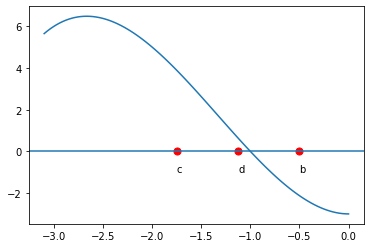

In [3]:
x = np.linspace(-3.1, 0, 100)
plt.plot(x, x**3 + 4*x**2 -3)

d = 0.5*(b+c)

plt.text(d,-1,"d")
plt.text(b,-1,"b")
plt.text(c,-1,"c")

plt.scatter([d,b,c], [f(d), f(b),f(c)], s=50, facecolors='none')
plt.scatter([d,b,c], [0,0,0], s=50, c='red')

xaxis = plt.axhline(0)
pass

We can terminate the process whenever the function evaluated at the new midpoint is 'close enough' to zero. This method is an example of what are known as 'bracketed methods'. This means the root is 'bracketed' by the end-points (it is somewhere in between). Another class of methods are 'open methods' - the root need not be somewhere in between the end-points (but it usually needs to be close!)

## Secant Method

The secant method also begins with two initial points, but without the constraint that the function values are of opposite signs.  We use the secant line to extrapolate the next candidate point.

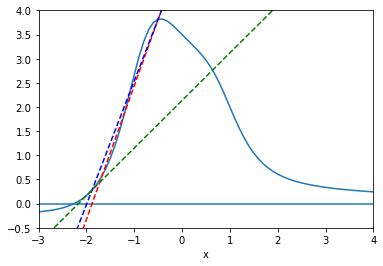

In [4]:
def f(x):
    return (x**3-2*x+7)/(x**4+2)

x = np.arange(-3,5, 0.1);
y = f(x)

p1=plt.plot(x, y)
plt.xlim(-3, 4)
plt.ylim(-.5, 4)
plt.xlabel('x')
plt.axhline(0)
t = np.arange(-10, 5., 0.1)

x0=-1.2
x1=-0.5
xvals = []
xvals.append(x0)
xvals.append(x1)
notconverge = 1
count = 0
cols=['r--','b--','g--','y--']
while (notconverge==1 and count <  3):
    slope=(f(xvals[count+1])-f(xvals[count]))/(xvals[count+1]-xvals[count])
    intercept=-slope*xvals[count+1]+f(xvals[count+1])
    plt.plot(t, slope*t + intercept, cols[count])
    nextval = -intercept/slope
    if abs(f(nextval)) < 0.001:
        notconverge=0
    else:
        xvals.append(nextval)
    count = count+1

plt.show()

The secant method has the advantage of fast convergence.  While the bisection method has a linear convergence rate (i.e. error goes to zero at the rate that $h(x) = x$ goes to zero, the secant method has a convergence rate that is faster than linear, but not quite quadratic (i.e. $\sim x^\alpha$, where $\alpha = \frac{1+\sqrt{5}}2 \approx 1.6$) however, the trade-off is that the secant method is not guaranteed to find a root in the brackets.

A variant of the secant method is known as the **method of false positions**. Conceptually it is identical to the secant method, except that instead of always using the last two values of $x$ for linear interpolation, it chooses the two most recent values that maintain the bracket property (i.e $f(a) f(b) < 0$). It is slower than the secant, but like the bisection, is safe.

## Newton-Raphson Method

We want to find the value $\theta$ so that some (differentiable) function $g(\theta)=0$. 
Idea: start with a guess, $\theta_0$.  Let $\tilde{\theta}$ denote the value of $\theta$ for which $g(\theta) = 0$ and define $h = \tilde{\theta} - \theta_0$.  Then:

$$
\begin{eqnarray*}
g(\tilde{\theta}) &=& 0 \\\\
&=&g(\theta_0 + h) \\\\
&\approx& g(\theta_0) + hg'(\theta_0)
\end{eqnarray*}
$$

This implies that 

$$ h\approx \frac{g(\theta_0)}{g'(\theta_0)}$$

So that

$$\tilde{\theta}\approx \theta_0 - \frac{g(\theta_0)}{g'(\theta_0)}$$

Thus, we set our next approximation:

$$\theta_1 = \theta_0 - \frac{g(\theta_0)}{g'(\theta_0)}$$

and we have developed an iterative procedure with:

$$\theta_n = \theta_{n-1} - \frac{g(\theta_{n-1})}{g'(\theta_{n-1})}$$

#### Example

Let $$g(x) = \frac{x^3-2x+7}{x^4+2}$$

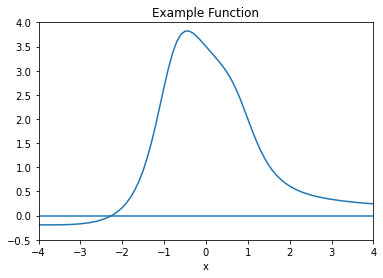

In [5]:
x = np.arange(-5,5, 0.1);
y = (x**3-2*x+7)/(x**4+2)

p1=plt.plot(x, y)
plt.xlim(-4, 4)
plt.ylim(-.5, 4)
plt.xlabel('x')
plt.axhline(0)
plt.title('Example Function')
plt.show()

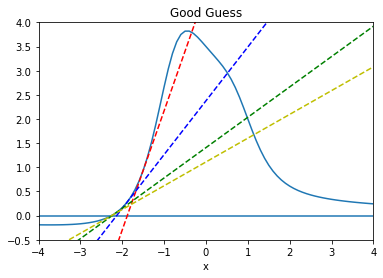

In [6]:
x = np.arange(-5,5, 0.1);
y = (x**3-2*x+7)/(x**4+2)

p1=plt.plot(x, y)
plt.xlim(-4, 4)
plt.ylim(-.5, 4)
plt.xlabel('x')
plt.axhline(0)
plt.title('Good Guess')
t = np.arange(-5, 5., 0.1)

x0=-1.5
xvals = []
xvals.append(x0)
notconverge = 1
count = 0
cols=['r--','b--','g--','y--','c--','m--','k--','w--']
while (notconverge==1 and count <  6):
    funval=(xvals[count]**3-2*xvals[count]+7)/(xvals[count]**4+2)
    slope=-((4*xvals[count]**3 *(7 - 2 *xvals[count] + xvals[count]**3))/(2 + xvals[count]**4)**2) + (-2 + 3 *xvals[count]**2)/(2 + xvals[count]**4)
   
    intercept=-slope*xvals[count]+(xvals[count]**3-2*xvals[count]+7)/(xvals[count]**4+2)

    plt.plot(t, slope*t + intercept, cols[count])
    nextval = -intercept/slope
    if abs(funval) < 0.01:
        notconverge=0
    else:
        xvals.append(nextval)
    count = count+1



From the graph, we see the zero is near -2.  We make an initial guess of $$x=-1.5$$

We have made an excellent choice for our first guess, and we can see rapid convergence!

In [7]:
funval

0.007591996330867034

In fact, the Newton-Raphson method converges quadratically.  However, NR (and the secant method) have a fatal flaw:

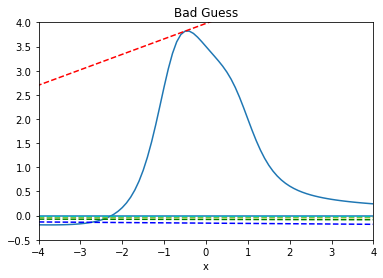

In [8]:
x = np.arange(-5,5, 0.1);
y = (x**3-2*x+7)/(x**4+2)

p1=plt.plot(x, y)
plt.xlim(-4, 4)
plt.ylim(-.5, 4)
plt.xlabel('x')
plt.axhline(0)
plt.title('Bad Guess')
t = np.arange(-5, 5., 0.1)

x0=-0.5
xvals = []
xvals.append(x0)
notconverge = 1
count = 0
cols=['r--','b--','g--','y--','c--','m--','k--','w--']
while (notconverge==1 and count <  6):
    funval=(xvals[count]**3-2*xvals[count]+7)/(xvals[count]**4+2)
    slope=-((4*xvals[count]**3 *(7 - 2 *xvals[count] + xvals[count]**3))/(2 + xvals[count]**4)**2) + (-2 + 3 *xvals[count]**2)/(2 + xvals[count]**4)
   
    intercept=-slope*xvals[count]+(xvals[count]**3-2*xvals[count]+7)/(xvals[count]**4+2)

    plt.plot(t, slope*t + intercept, cols[count])
    nextval = -intercept/slope
    if abs(funval) < 0.01:
        notconverge = 0
    else:
        xvals.append(nextval)
    count = count+1

We have stumbled on the horizontal asymptote.  The algorithm fails to converge. 

### Convergence Rate

The following is a derivation of the convergence rate of the NR method:


Suppose $x_k \; \rightarrow \; x^*$ and $g'(x^*) \neq 0$.  Then we may write:

$$x_k = x^* + \epsilon_k$$.

Now expand $g$ at $x^*$:

$$g(x_k) = g(x^*) + g'(x^*)\epsilon_k + \frac12 g''(x^*)\epsilon_k^2 + ...$$
$$g'(x_k)=g'(x^*) + g''(x^*)\epsilon_k$$

We have that


\begin{eqnarray}
\epsilon_{k+1} &=& \epsilon_k + \left(x_{k-1}-x_k\right)\\
&=& \epsilon_k -\frac{g(x_k)}{g'(x_k)}\\
&\approx & \frac{g'(x^*)\epsilon_k + \frac12g''(x^*)\epsilon_k^2}{g'(x^*)+g''(x^*)\epsilon_k}\\
&\approx & \frac{g''(x^*)}{2g'(x^*)}\epsilon_k^2
\end{eqnarray}

## Gauss-Newton

For 1D, the Newton method is
$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
$$

We can generalize to $k$ dimensions by 
$$
x_{n+1} = x_n - J^{-1} f(x_n)
$$
where $x$ and $f(x)$ are now vectors, and $J^{-1}$ is the inverse Jacobian matrix. In general, the Jacobian is not a square matrix, and we use the generalized inverse $(J^TJ)^{-1}J^T$ instead, giving
$$
x_{n+1} = x_n - (J^TJ)^{-1}J^T f(x_n)
$$

In multivariate nonlinear estimation problems, we can find the vector of parameters $\beta$ by minimizing the residuals $r(\beta)$, 
$$
\beta_{n+1} = \beta_n - (J^TJ)^{-1}J^T r(\beta_n)
$$
where the entries of the Jacobian matrix $J$ are
$$
J_{ij} = \frac{\partial r_i(\beta)}{\partial \beta_j}
$$

## Inverse Quadratic Interpolation

Inverse quadratic interpolation is a type of polynomial interpolation.  Polynomial interpolation simply means we find the polynomial of least degree that fits a set of points.  In quadratic interpolation, we use three points, and find the quadratic polynomial that passes through those three points.  

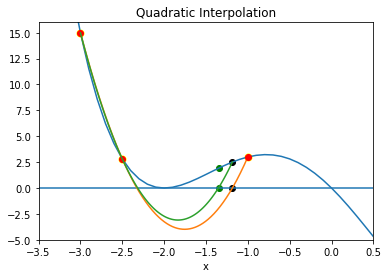

In [9]:
def f(x):
    return (x - 2) * x * (x + 2)**2


x = np.arange(-5,5, 0.1);
plt.plot(x, f(x))
plt.xlim(-3.5, 0.5)
plt.ylim(-5, 16)
plt.xlabel('x')
plt.axhline(0)
plt.title("Quadratic Interpolation")

#First Interpolation
x0=np.array([-3,-2.5,-1.0])
y0=f(x0)
f2 = interp1d(x0, y0,kind='quadratic')

#Plot parabola
xs = np.linspace(-3, -1, num=10000, endpoint=True)
plt.plot(xs, f2(xs))

#Plot first triplet
plt.plot(x0, f(x0),'ro');
plt.scatter(x0, f(x0), s=50, c='yellow');

#New x value
xnew=xs[np.where(abs(f2(xs))==min(abs(f2(xs))))]

plt.scatter(np.append(xnew,xnew), np.append(0,f(xnew)), c='black');

#New triplet
x1=np.append([-3,-2.5],xnew)
y1=f(x1)
f2 = interp1d(x1, y1,kind='quadratic')

#New Parabola
xs = np.linspace(min(x1), max(x1), num=100, endpoint=True)
plt.plot(xs, f2(xs))

xnew=xs[np.where(abs(f2(xs))==min(abs(f2(xs))))]
plt.scatter(np.append(xnew,xnew), np.append(0,f(xnew)), c='green');



So that's the idea behind quadratic interpolation. Use a quadratic approximation, find the zero of interest, use that as a new point for the next quadratic approximation.


Inverse quadratic interpolation means we do quadratic interpolation on the *inverse function*.  So, if we are looking for a root of $f$, we approximate $f^{-1}(x)$ using quadratic interpolation. This just means fitting $x$ as a function of $y$, so that the quadratic is turned on its side and we are guaranteed that it cuts the x-axis somewhere. Note that the secant method can be viewed as a *linear* interpolation on the inverse of $f$. We can write:

$$f^{-1}(y) = \frac{(y-f(x_n))(y-f(x_{n-1}))}{(f(x_{n-2})-f(x_{n-1}))(f(x_{n-2})-f(x_{n}))}x_{n-2} + \frac{(y-f(x_n))(y-f(x_{n-2}))}{(f(x_{n-1})-f(x_{n-2}))(f(x_{n-1})-f(x_{n}))}x_{n-1} + \frac{(y-f(x_{n-2}))(y-f(x_{n-1}))}{(f(x_{n})-f(x_{n-2}))(f(x_{n})-f(x_{n-1}))}x_{n-1}$$

We use the above formula to find the next guess $x_{n+1}$ for a zero of $f$ (so $y=0$):

$$x_{n+1} = \frac{f(x_n)f(x_{n-1})}{(f(x_{n-2})-f(x_{n-1}))(f(x_{n-2})-f(x_{n}))}x_{n-2} + \frac{f(x_n)f(x_{n-2})}{(f(x_{n-1})-f(x_{n-2}))(f(x_{n-1})-f(x_{n}))}x_{n-1} + \frac{f(x_{n-2})f(x_{n-1})}{(f(x_{n})-f(x_{n-2}))(f(x_{n})-f(x_{n-1}))}x_{n}$$

We aren't so much interested in deriving this as we are understanding the procedure:




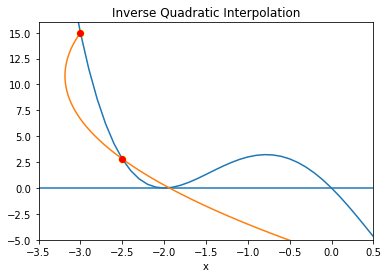

In [10]:
x = np.arange(-5,5, 0.1);
plt.plot(x, f(x))
plt.xlim(-3.5, 0.5)
plt.ylim(-5, 16)
plt.xlabel('x')
plt.axhline(0)
plt.title("Inverse Quadratic Interpolation")

#First Interpolation
x0=np.array([-3,-2.5,1])
y0=f(x0)
f2 = interp1d(y0, x0,kind='quadratic')

#Plot parabola
xs = np.linspace(min(f(x0)), max(f(x0)), num=10000, endpoint=True)
plt.plot(f2(xs), xs)

#Plot first triplet
plt.plot(x0, f(x0),'ro');
plt.scatter(x0, f(x0), s=50, c='yellow');

Convergence rate is approximately $1.8$. The advantage of the inverse method is that we will *always* have a real root (the parabola will always cross the x-axis). A serious disadvantage is that the initial points must be very close to the root or the method may not converge.

That is why it is usually used in conjunction with other methods.

## Brentq Method

Brent's method is a combination of bisection, secant and inverse quadratic interpolation.  Like bisection, it is a 'bracketed' method (starts with points $(a,b)$ such that $f(a)f(b)<0$.

Roughly speaking, the method begins by using the secant method to obtain a third point $c$, then uses inverse quadratic interpolation to generate the next possible root. Without going into too much detail, the algorithm attempts to assess when interpolation will go awry, and if so, performs a bisection step. Also, it has certain criteria to reject an iterate. If that happens, the next step will be linear interpolation (secant method). 

To find zeros, use 

In [11]:
from scipy.optimize import brentq, newton

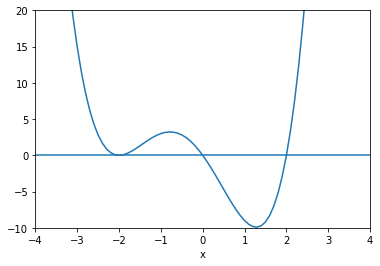

In [12]:
x = np.arange(-5,5, 0.1);
p1=plt.plot(x, f(x))
plt.xlim(-4, 4)
plt.ylim(-10, 20)
plt.xlabel('x')
plt.axhline(0)
pass

In [13]:
scipy.optimize.brentq(f,-1,.5)

-7.864845203343107e-19

In [14]:
scipy.optimize.brentq(f,.5,3)

2.0

## Roots of polynomials

One method for finding roots of polynomials converts the problem into an eigenvalue one by using the **companion matrix** of a polynomial. For a polynomial 

$$
p(x) = a_0 + a_1x + a_2 x^2 + \ldots + a_m x^m
$$

the companion matrix is

$$
A = \begin{bmatrix}
-a_{m-1}/a_m & -a_{m-2}/a_m & \ldots & -a_0/a_m \\
1 & 0 & \ldots & 0 \\
0 & 1 & \ldots & 0 \\
\vdots & \vdots & \ldots & \vdots \\
0 & 0 & \ldots & 0
\end{bmatrix}
$$

The characteristic polynomial of the companion matrix is $\lvert \lambda I - A \rvert$ which expands to 

$$
a_0 + a_1 \lambda + a_2 \lambda^2 + \ldots + a_m \lambda^m
$$

In other words, the roots we are seeking are the eigenvalues of the companion matrix.

For example, to find the cube roots of unity, we solve $x^3 - 1 = 0$. The `roots` function uses the companion matrix method to find roots of polynomials.

In [15]:
# Coefficients of $x^3, x^2, x^1, x^0$

poly = np.array([1, 0, 0, -1])

In [16]:
x = np.roots(poly)
x

array([-0.5+0.8660254j, -0.5-0.8660254j,  1. +0.j       ])

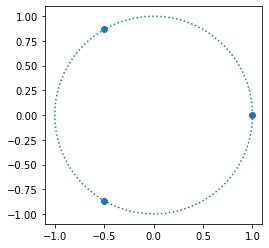

In [17]:
plt.scatter([z.real for z in x], [z.imag for z in x])
theta = np.linspace(0, 2*np.pi, 100)
u = np.cos(theta)
v = np.sin(theta)
plt.plot(u, v, ':')
plt.axis('square')
pass

## Using `scipy.optimize`

### Finding roots of univariate equations

In [18]:
def f(x):
    return x**3-3*x+1

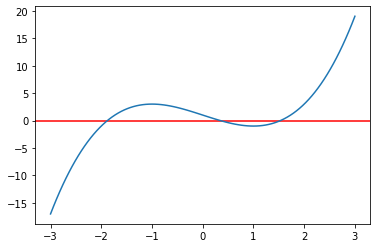

In [19]:
x = np.linspace(-3,3,100)
plt.axhline(0, c='red')
plt.plot(x, f(x))
pass

#### `brentq` is the recommended method

In [20]:
brentq(f, -3, 0), brentq(f, 0, 1), brentq(f, 1,3)

(-1.8793852415718166, 0.3472963553337031, 1.532088886237956)

#### Secant method

In [21]:
newton(f, -3), newton(f, 0), newton(f, 3)

(-1.8793852415718166, 0.34729635533385395, 1.5320888862379578)

#### Newton-Raphson method

In [22]:
fprime = lambda x: 3*x**2 - 3
newton(f, -3, fprime), newton(f, 0, fprime), newton(f, 3, fprime)

(-1.8793852415718166, 0.34729635533386066, 1.532088886237956)

### Finding fixed points

Finding the fixed points of a function $g(x) = x$ is the same as finding the roots of $g(x) - x$. However, specialized algorithms also exist - e.g. using `scipy.optimize.fixedpoint`.

In [23]:
from scipy.optimize import fixed_point

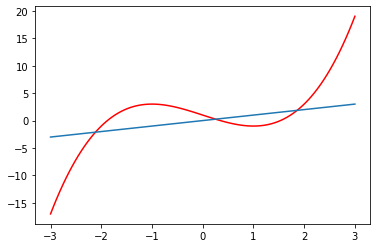

In [24]:
x = np.linspace(-3,3,100)
plt.plot(x, f(x), color='red')
plt.plot(x, x)
pass

In [25]:
fixed_point(f, 0), fixed_point(f, -3), fixed_point(f, 3)

(array(0.25410169), array(-2.11490754), array(1.86080585))

### Mutlivariate roots and fixed points

Use `root` to solve polynomial equations. Use `fsolve` for non-polynomial equations.

In [26]:
from scipy.optimize import root, fsolve

Suppose we want to solve a sysetm of $m$ equations with $n$ unknowns

\begin{align}
f(x_0, x_1) &= x_1 - 3x_0(x_0+1)(x_0-1) \\
g(x_0, x_1) &= 0.25 x_0^2 + x_1^2 - 1
\end{align}

Note that the equations are non-linear and there can be multiple solutions. These can be interpreted as fixed points of a system of differential equations.

In [27]:
def f(x):
    return [x[1] - 3*x[0]*(x[0]+1)*(x[0]-1),
            .25*x[0]**2 + x[1]**2 - 1]

In [28]:
sol = root(f, (0.5, 0.5))
sol.x

array([1.11694147, 0.82952422])

In [29]:
fsolve(f, (0.5, 0.5))

array([1.11694147, 0.82952422])

In [30]:
r0 = root(f,[1,1])
r1 = root(f,[0,1])
r2 = root(f,[-1,1.1])
r3 = root(f,[-1,-1])
r4 = root(f,[2,-0.5])

roots = np.c_[r0.x, r1.x, r2.x, r3.x, r4.x]

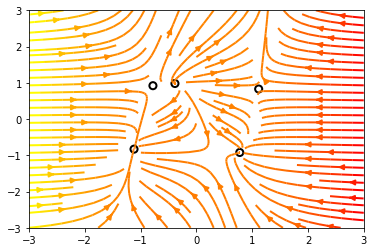

In [31]:
Y, X = np.mgrid[-3:3:100j, -3:3:100j]
U = Y - 3*X*(X + 1)*(X-1)
V = .25*X**2 + Y**2 - 1

plt.streamplot(X, Y, U, V, color=U, linewidth=2, cmap=plt.cm.autumn)
plt.scatter(roots[0], roots[1], s=50, c='none', edgecolors='k', linewidth=2)
pass

#### We can also give the Jacobian

In [32]:
def jac(x):
    return [[-6*x[0], 1], [0.5*x[0], 2*x[1]]]

In [33]:
sol = root(f, (0.5, 0.5), jac=jac)
sol.x, sol.fun

(array([1.11694147, 0.82952422]), array([-4.23383550e-12, -3.31612515e-12]))

#### Check that values found are really roots


In [34]:
np.allclose(f(sol.x), 0)

True

#### Starting from other initial conditions, different roots may be found

In [35]:
sol = root(f, (12,12))
sol.x

array([ 0.77801314, -0.92123498])

In [36]:
np.allclose(f(sol.x), 0)

True